In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from os.path import join

path = "/content/gdrive/My Drive/USA_project"

inflation_data = pd.read_csv(join(path, 'Inflation_CPI_US.csv'))
interest_rate_data = pd.read_csv(join(path, 'Interestrates_US.csv'))
house_price_index_data = pd.read_csv(join(path, 'House_price_index.csv'))
stock_market_data = pd.read_csv(join(path, 'Market.csv'))
mortgage_debt_service_data = pd.read_csv(join(path, 'Mortgagedebt_service.csv'))


In [4]:
# Check for missing values in each dataset
print("Missing values in Inflation Data:")
print(inflation_data.isnull().sum())


Missing values in Inflation Data:
observation_date    0
CPIAUCSL            0
dtype: int64


In [5]:
print("\nMissing values in Interest Rate Data:")
print(interest_rate_data.isnull().sum())


Missing values in Interest Rate Data:
observation_date    0
FEDFUNDS            0
dtype: int64


In [6]:
# Forward Fill missing values
stock_market_data = stock_market_data.fillna(method='ffill')

# Verify after forward filling
print("Missing values after forward filling:")
print(stock_market_data.isnull().sum())

Missing values after forward filling:
Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-6-34bd66070ae0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_market_data = stock_market_data.fillna(method='ffill')


In [7]:
print("\nMissing values in Mortgage Debt Service Data:")
print(mortgage_debt_service_data.isnull().sum())


Missing values in Mortgage Debt Service Data:
observation_date    0
MDSP                0
dtype: int64


In [8]:
print("\nMissing values in Housing Price Index Data:")
print(house_price_index_data.isnull().sum())


Missing values in Housing Price Index Data:
observation_date    0
USSTHPI             0
dtype: int64


In [9]:
# Check column names of all datasets
print("Inflation Data columns:", inflation_data.columns)
print("Interest Rate Data columns:", interest_rate_data.columns)
print("Stock Market Data columns:", stock_market_data.columns)
print("Mortgage Debt Service Data columns:", mortgage_debt_service_data.columns)
print("House Price Index Data columns:", house_price_index_data.columns)

Inflation Data columns: Index(['observation_date', 'CPIAUCSL'], dtype='object')
Interest Rate Data columns: Index(['observation_date', 'FEDFUNDS'], dtype='object')
Stock Market Data columns: Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Mortgage Debt Service Data columns: Index(['observation_date', 'MDSP'], dtype='object')
House Price Index Data columns: Index(['observation_date', 'USSTHPI'], dtype='object')


In [10]:
# Rename columns for consistency
stock_market_data = stock_market_data.rename(columns={'Date': 'observation_date'})

# Convert 'Date' column to datetime format

stock_market_data['observation_date'] = pd.to_datetime(stock_market_data['observation_date'], errors='coerce')
inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'], errors='coerce')
interest_rate_data['observation_date'] = pd.to_datetime(interest_rate_data['observation_date'], errors='coerce')
mortgage_debt_service_data['observation_date'] = pd.to_datetime(mortgage_debt_service_data['observation_date'], errors='coerce')
house_price_index_data['observation_date'] = pd.to_datetime(house_price_index_data['observation_date'], errors='coerce')



In [11]:
# Define the common start and end dates for the analysis
start_date = '2000-01-01'
end_date = '2025-01-01'

# Filter datasets to only include rows within this time range
inflation_data = inflation_data[(inflation_data['observation_date'] >= start_date) & (inflation_data['observation_date'] <= end_date)]
interest_rate_data = interest_rate_data[(interest_rate_data['observation_date'] >= start_date) & (interest_rate_data['observation_date'] <= end_date)]
stock_market_data = stock_market_data[(stock_market_data['observation_date'] >= start_date) & (stock_market_data['observation_date'] <= end_date)]
mortgage_debt_service_data = mortgage_debt_service_data[(mortgage_debt_service_data['observation_date'] >= start_date) & (mortgage_debt_service_data['observation_date'] <= end_date)]
house_price_index_data = house_price_index_data[(house_price_index_data['observation_date'] >= start_date) & (house_price_index_data['observation_date'] <= end_date)]



In [12]:
# Make sure all date columns are in datetime format before merging
inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'], errors='coerce')
interest_rate_data['observation_date'] = pd.to_datetime(interest_rate_data['observation_date'], errors='coerce')
stock_market_data['observation_date'] = pd.to_datetime(stock_market_data['observation_date'], errors='coerce')
mortgage_debt_service_data['observation_date'] = pd.to_datetime(mortgage_debt_service_data['observation_date'], errors='coerce')
house_price_index_data['observation_date'] = pd.to_datetime(house_price_index_data['observation_date'], errors='coerce')

In [13]:
# Merge inflation data with house price index data
inflation_house_price_index_data = pd.merge(house_price_index_data, inflation_data, left_on='observation_date', right_on='observation_date', how='inner')

# Check the first few rows
inflation_house_price_index_data

,observation_date,USSTHPI,CPIAUCSL
0,2000-01-01,230.12,169.300
1,2000-04-01,233.87,170.900
2,2000-07-01,238.14,172.700
3,2000-10-01,241.78,173.900
4,2001-01-01,247.76,175.600
...,...,...,...
95,2023-10-01,655.69,307.653
96,2024-01-01,664.22,309.794
97,2024-04-01,681.11,313.016
98,2024-07-01,687.80,313.566


In [14]:
# Merge interest rate data (FEDFUNDS) with house price index data (USSTHPI)
interest_rate_house_price_index_data = pd.merge(house_price_index_data, interest_rate_data, left_on='observation_date', right_on='observation_date', how='inner')

interest_rate_house_price_index_data

,observation_date,USSTHPI,FEDFUNDS
0,2000-01-01,230.12,5.45
1,2000-04-01,233.87,6.02
2,2000-07-01,238.14,6.54
3,2000-10-01,241.78,6.51
4,2001-01-01,247.76,5.98
...,...,...,...
95,2023-10-01,655.69,5.33
96,2024-01-01,664.22,5.33
97,2024-04-01,681.11,5.33
98,2024-07-01,687.80,5.33


In [15]:
# Merge mortgage debt service data (MDSP) with house price index data (USSTHPI)
mortgage_debt_service_house_price_index_data = pd.merge(house_price_index_data, mortgage_debt_service_data, left_on='observation_date', right_on='observation_date', how='inner')

mortgage_debt_service_house_price_index_data

,observation_date,USSTHPI,MDSP
0,2000-01-01,230.12,5.603787
1,2000-04-01,233.87,5.649237
2,2000-07-01,238.14,5.681759
3,2000-10-01,241.78,5.726554
4,2001-01-01,247.76,5.720924
...,...,...,...
94,2023-07-01,653.73,5.678232
95,2023-10-01,655.69,5.704593
96,2024-01-01,664.22,5.714631
97,2024-04-01,681.11,5.773469


In [16]:
# Aggregate the stock market data by observation_date (mean of stock market columns)
stock_market_data_aggregated = stock_market_data.groupby('observation_date').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Adj Close': 'mean',
    'Volume': 'sum',  # Summing up volume across all indices for each day
}).reset_index()
# Merge aggregated stock market data with house price index data
stock_market_house_price_index_data = pd.merge(house_price_index_data, stock_market_data_aggregated, left_on='observation_date', right_on='observation_date', how='inner')

# Check the first few rows
print(stock_market_house_price_index_data.head())


  observation_date  USSTHPI         Open         High          Low  \
0       2001-01-01   247.76  6523.404824  6591.483868  6491.942518   
1       2001-10-01   258.99  4484.036636  4533.072283  4437.209246   
2       2002-01-01   262.71  5307.166791  5345.839960  5285.770618   
3       2002-04-01   267.19  5227.036376  5265.060613  5207.689758   
4       2002-07-01   272.49  4788.739416  4826.266774  4744.028514   

         Close    Adj Close        Volume  
0  6545.596765  6545.589685  4.925338e+09  
1  4514.056468  4514.052053  1.107344e+10  
2  5322.317096  5322.311310  4.647204e+09  
3  5238.506358  5238.501434  1.099218e+10  
4  4771.973796  4771.968913  2.027573e+10  


In [17]:
# EDA
print(inflation_house_price_index_data.describe())
print(interest_rate_house_price_index_data.describe())
print(mortgage_debt_service_house_price_index_data.describe())
print(stock_market_house_price_index_data.describe())



          observation_date     USSTHPI    CPIAUCSL
count                  100  100.000000  100.000000
mean   2012-05-16 13:40:48  386.679700  229.420570
min    2000-01-01 00:00:00  230.120000  169.300000
25%    2006-03-09 12:00:00  315.052500  200.350000
50%    2012-05-16 12:00:00  354.860000  228.888500
75%    2018-07-24 00:00:00  421.917500  251.550750
max    2024-10-01 00:00:00  690.900000  315.564000
std                    NaN  115.198626   38.111656
          observation_date     USSTHPI    FEDFUNDS
count                  100  100.000000  100.000000
mean   2012-05-16 13:40:48  386.679700    1.922800
min    2000-01-01 00:00:00  230.120000    0.050000
25%    2006-03-09 12:00:00  315.052500    0.140000
50%    2012-05-16 12:00:00  354.860000    1.195000
75%    2018-07-24 00:00:00  421.917500    3.387500
max    2024-10-01 00:00:00  690.900000    6.540000
std                    NaN  115.198626    2.032656
                    observation_date     USSTHPI       MDSP
count                 

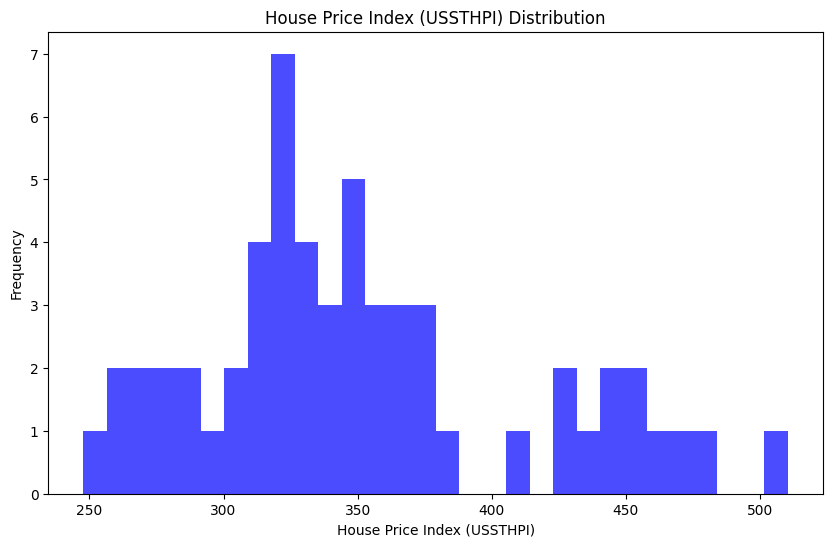

In [18]:
# 1. Histogram for House Price Index (USSTHPI)
plt.figure(figsize=(10, 6))
plt.hist(stock_market_house_price_index_data['USSTHPI'], bins=30, color='blue', alpha=0.7)
plt.title('House Price Index (USSTHPI) Distribution')
plt.xlabel('House Price Index (USSTHPI)')
plt.ylabel('Frequency')
plt.show()

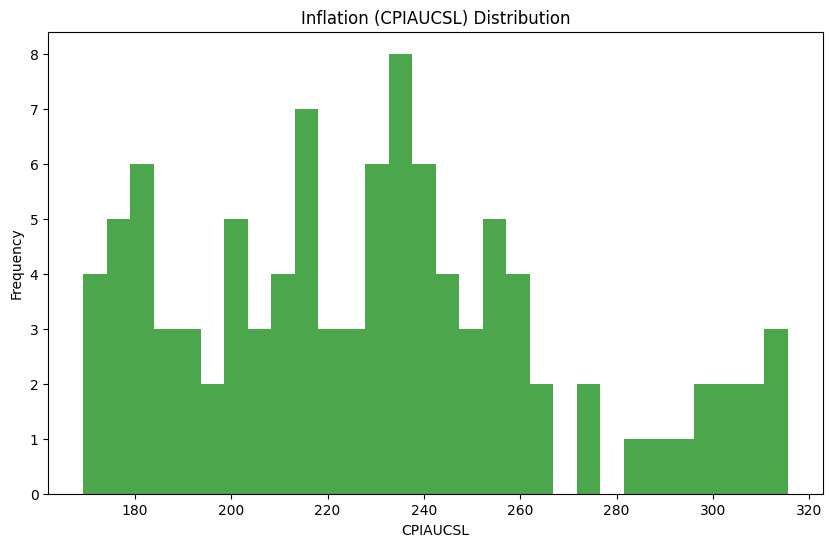

In [19]:
# 2. Histogram for Inflation (CPIAUCSL)
plt.figure(figsize=(10, 6))
plt.hist(inflation_house_price_index_data['CPIAUCSL'], bins=30, color='green', alpha=0.7)
plt.title('Inflation (CPIAUCSL) Distribution')
plt.xlabel('CPIAUCSL')
plt.ylabel('Frequency')
plt.show()

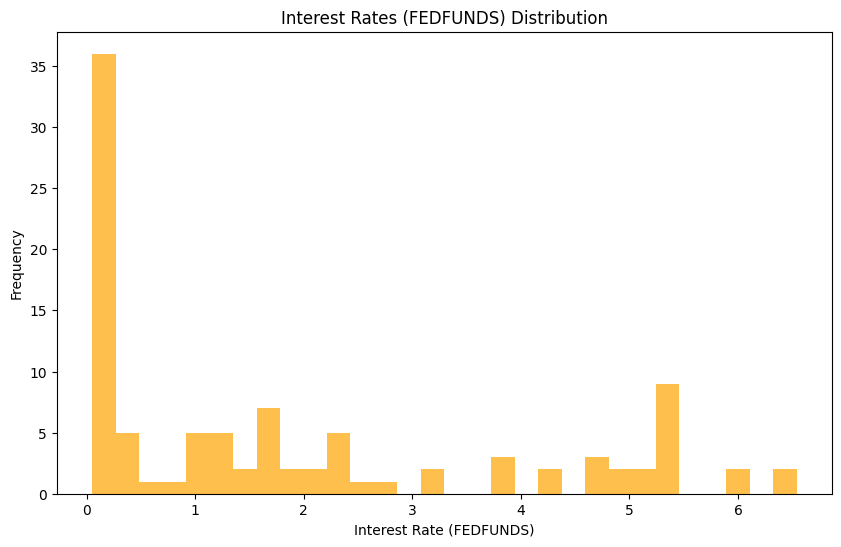

In [20]:
# 3. Histogram for Interest Rates (FEDFUNDS)
plt.figure(figsize=(10, 6))
plt.hist(interest_rate_house_price_index_data['FEDFUNDS'], bins=30, color='orange', alpha=0.7)
plt.title('Interest Rates (FEDFUNDS) Distribution')
plt.xlabel('Interest Rate (FEDFUNDS)')
plt.ylabel('Frequency')
plt.show()

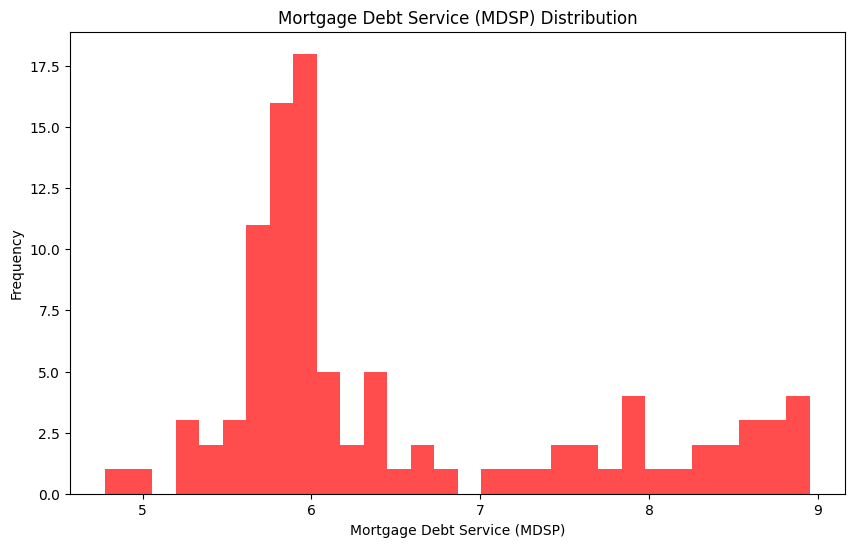

In [21]:
# 4. Histogram for Mortgage Debt Service (MDSP)
plt.figure(figsize=(10, 6))
plt.hist(mortgage_debt_service_house_price_index_data['MDSP'], bins=30, color='red', alpha=0.7)
plt.title('Mortgage Debt Service (MDSP) Distribution')
plt.xlabel('Mortgage Debt Service (MDSP)')
plt.ylabel('Frequency')
plt.show()

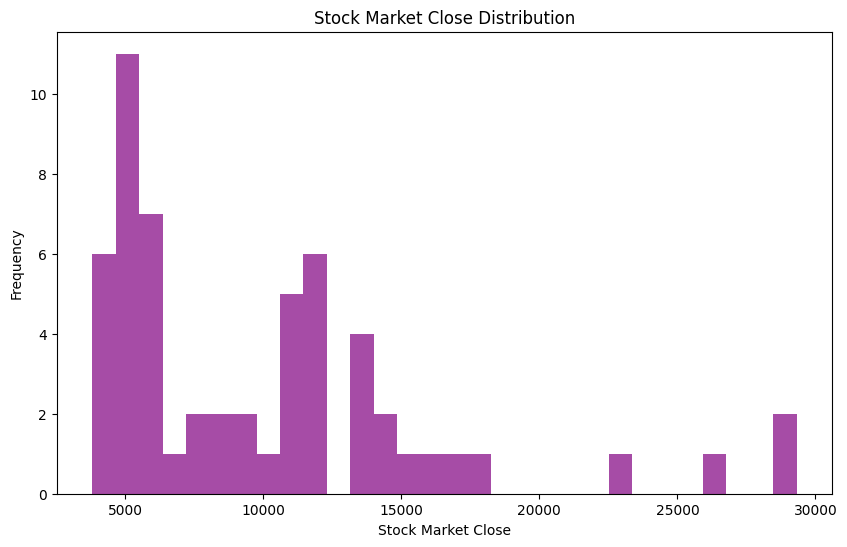

In [22]:
# 5. Histogram for Stock Market Data (Close)
plt.figure(figsize=(10, 6))
plt.hist(stock_market_house_price_index_data['Close'], bins=30, color='purple', alpha=0.7)
plt.title('Stock Market Close Distribution')
plt.xlabel('Stock Market Close')
plt.ylabel('Frequency')
plt.show()

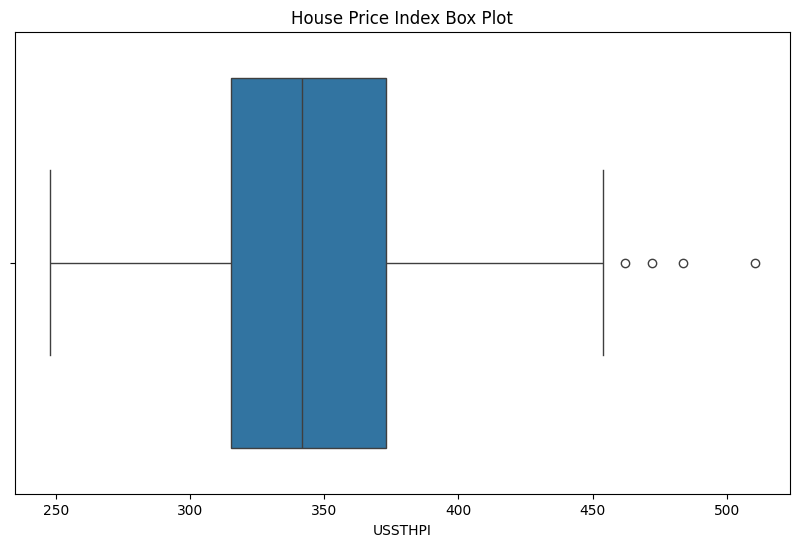

In [23]:
# Boxplot for House Price Index (USSTHPI)
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_market_house_price_index_data['USSTHPI'])
plt.title('House Price Index Box Plot')
plt.show()


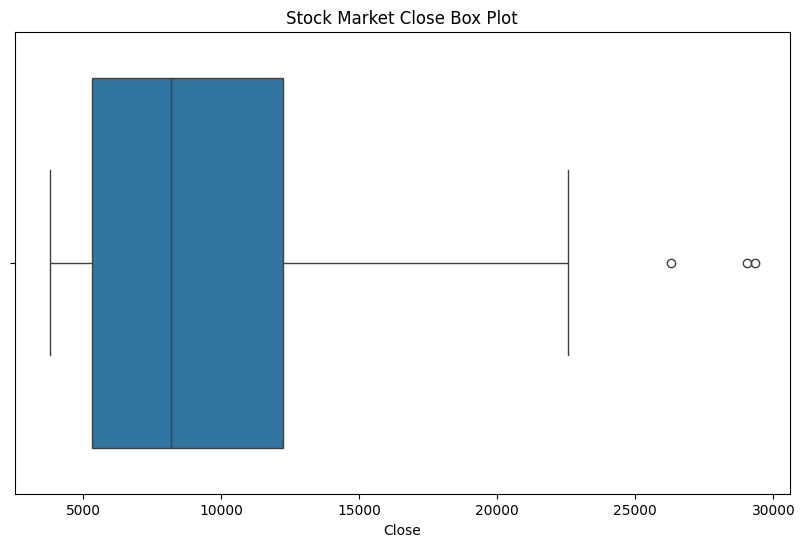

In [24]:
# Boxplot for stock market data
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_market_house_price_index_data['Close'])
plt.title('Stock Market Close Box Plot')
plt.show()

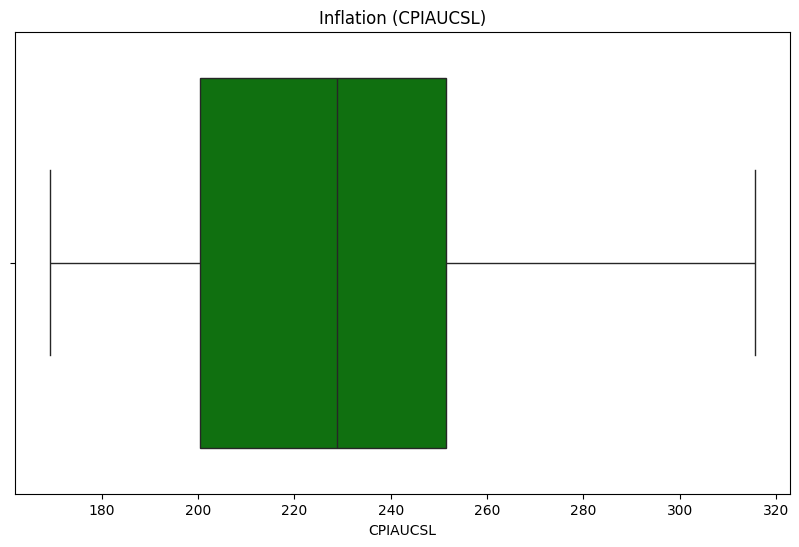

In [25]:
# Boxplot for inflation
plt.figure(figsize=(10, 6))
sns.boxplot(data=inflation_house_price_index_data, x='CPIAUCSL', color='green')
plt.title('Inflation (CPIAUCSL)')
plt.xlabel('CPIAUCSL')
plt.show()

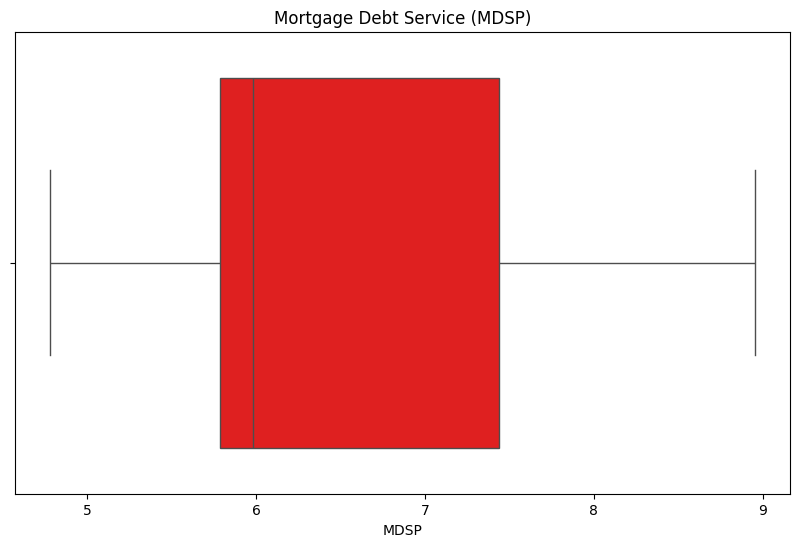

In [26]:
# Boxplot for Mortgage Debt Service (MDSP)
plt.figure(figsize=(10, 6))
sns.boxplot(data=mortgage_debt_service_house_price_index_data, x='MDSP', color='red')
plt.title('Mortgage Debt Service (MDSP)')
plt.xlabel('MDSP')
plt.show()


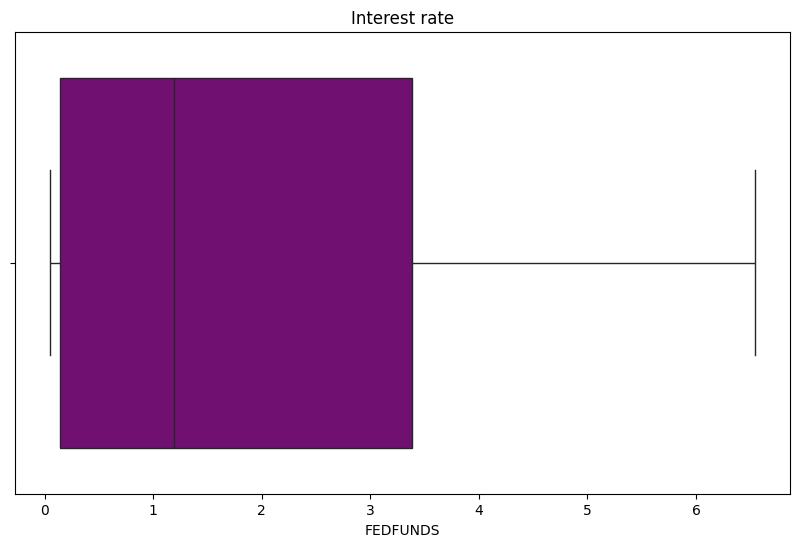

In [27]:
# Box plot for interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(interest_rate_house_price_index_data, x='FEDFUNDS', color='purple')
plt.title('Interest rate')
plt.xlabel('FEDFUNDS')
plt.show()

In [28]:
# Merge interest rate data
inflation_interest_house_price_index_data = pd.merge(inflation_house_price_index_data, interest_rate_data,
                                                      left_on='observation_date', right_on='observation_date', how='inner')

# Merge stock market data
inflation_interest_stock_house_price_index_data = pd.merge(inflation_interest_house_price_index_data, stock_market_data,
                                                           left_on='observation_date', right_on='observation_date', how='inner')
# Merge mortgage debt service data
final_combined_data = pd.merge(inflation_interest_stock_house_price_index_data, mortgage_debt_service_data,
                               left_on='observation_date', right_on='observation_date', how='inner')
# Verify the final combined data
print(final_combined_data.head())


  observation_date  USSTHPI  CPIAUCSL  FEDFUNDS      Index          Open  \
0       2001-01-01   247.76     175.6      5.98        HSI  14864.040040   
1       2001-01-01   247.76     175.6      5.98  000001.SS   2055.827881   
2       2001-01-01   247.76     175.6      5.98     GSPTSE   8878.299805   
3       2001-01-01   247.76     175.6      5.98  399001.SZ   4709.370117   
4       2001-01-01   247.76     175.6      5.98      GDAXI   6376.100098   

           High           Low         Close     Adj Close        Volume  \
0  15154.919920  14785.009770  15095.530270  15095.530270  0.000000e+00   
1   2073.877930   2055.504883   2073.477051   2073.477051  0.000000e+00   
2   8998.299805   8861.700195   8933.700195   8933.700195  4.909270e+09   
3   4755.240234   4709.370117   4752.750000   4752.696777  0.000000e+00   
4   6469.740234   6364.100098   6433.609863   6433.609863  1.581500e+07   

       MDSP  
0  5.720924  
1  5.720924  
2  5.720924  
3  5.720924  
4  5.720924  


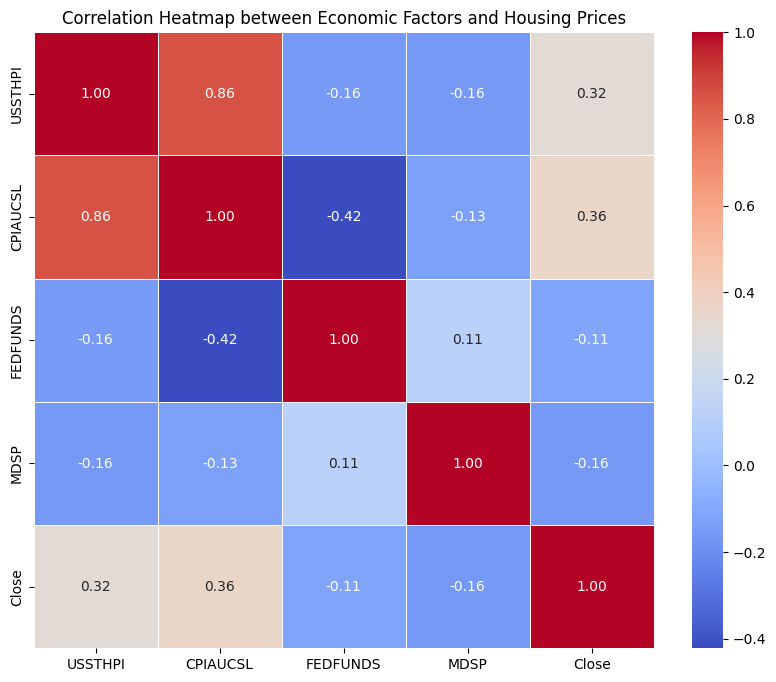

In [29]:
# Calculate the correlation matrix
correlation_matrix = final_combined_data[['USSTHPI', 'CPIAUCSL', 'FEDFUNDS', 'MDSP', 'Close']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Economic Factors and Housing Prices')
plt.show()


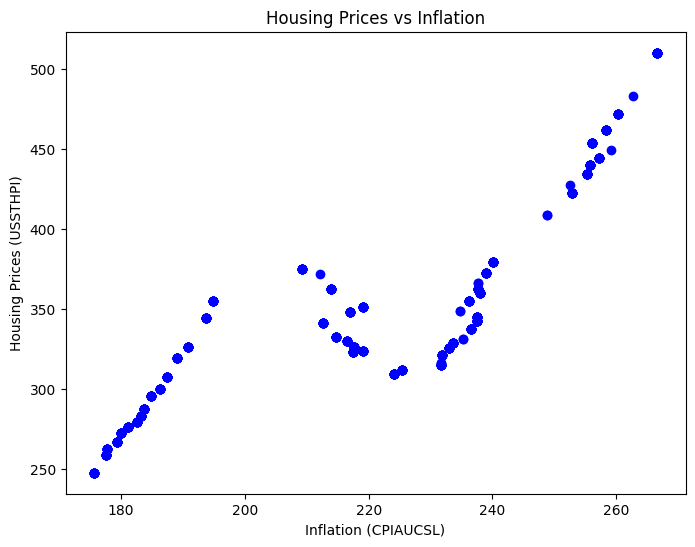

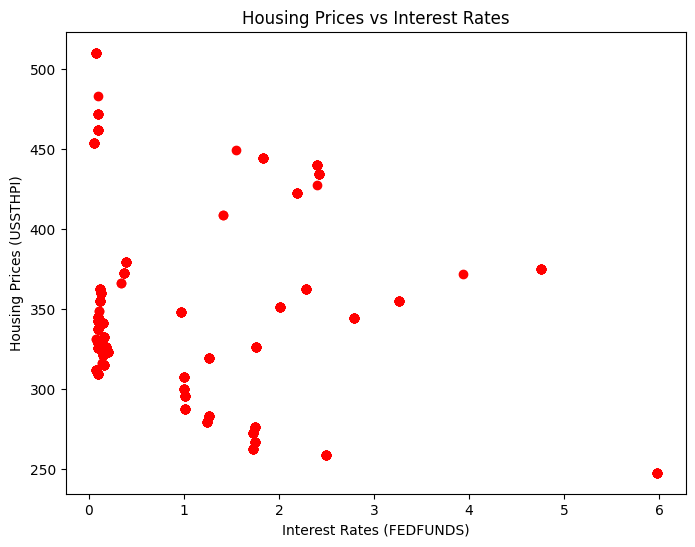

In [30]:
# Scatter plot for Housing Prices vs Inflation
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['CPIAUCSL'], final_combined_data['USSTHPI'], color='blue')
plt.title('Housing Prices vs Inflation')
plt.xlabel('Inflation (CPIAUCSL)')
plt.ylabel('Housing Prices (USSTHPI)')
plt.show()

# Scatter plot for Housing Prices vs Interest Rates
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['FEDFUNDS'], final_combined_data['USSTHPI'], color='red')
plt.title('Housing Prices vs Interest Rates')
plt.xlabel('Interest Rates (FEDFUNDS)')
plt.ylabel('Housing Prices (USSTHPI)')
plt.show()


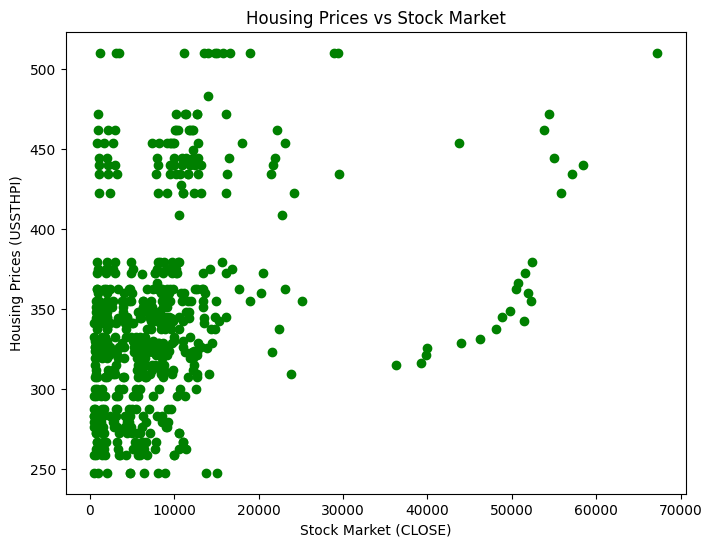

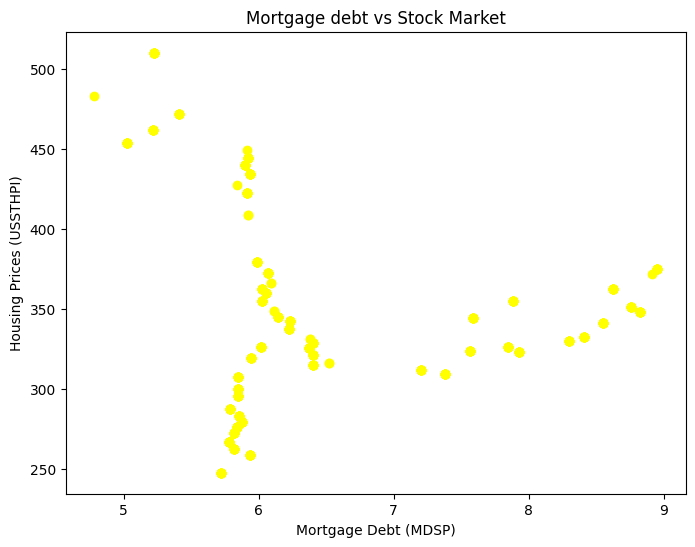

In [ ]:
# Scatter Plot for Stock Market (Close) vs House Price Index (USSTHPI)
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['Close'], final_combined_data['USSTHPI'], color='green')
plt.title('Housing Prices vs Stock Market')
plt.xlabel('Stock Market (CLOSE)')
plt.ylabel('Housing Prices (USSTHPI)')
plt.show()

# Scatter Plot for Mortgage Debt Service Payments (MDSP) vs House Price Index (USSTHPI)
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['MDSP'], final_combined_data['USSTHPI'], color='yellow')
plt.title('Mortgage debt vs Stock Market')
plt.xlabel('Mortgage Debt (MDSP)')
plt.ylabel('Housing Prices (USSTHPI)')
plt.show()

In [31]:
from scipy import stats

# Function to perform hypothesis test (Pearson correlation)
def hypothesis_test(data, x_column, y_column):
    correlation, p_value = stats.pearsonr(data[x_column], data[y_column])
    return correlation, p_value

# Test for Inflation (CPIAUCSL) vs Housing Prices (USSTHPI)
correlation_inflation, p_value_inflation = hypothesis_test(final_combined_data, 'CPIAUCSL', 'USSTHPI')
print("Inflation (CPIAUCSL) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_inflation}, P-value: {p_value_inflation}")
if p_value_inflation < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Interest Rates (FEDFUNDS) vs Housing Prices (USSTHPI)
correlation_interest_rate, p_value_interest_rate = hypothesis_test(final_combined_data, 'FEDFUNDS', 'USSTHPI')
print("\nInterest Rates (FEDFUNDS) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_interest_rate}, P-value: {p_value_interest_rate}")
if p_value_interest_rate < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Stock Market (Close) vs Housing Prices (USSTHPI)
correlation_stock_market, p_value_stock_market = hypothesis_test(final_combined_data, 'Close', 'USSTHPI')
print("\nStock Market (Close) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_stock_market}, P-value: {p_value_stock_market}")
if p_value_stock_market < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Mortgage Debt Service Payments (MDSP) vs Housing Prices (USSTHPI)
correlation_mortgage_debt, p_value_mortgage_debt = hypothesis_test(final_combined_data, 'MDSP', 'USSTHPI')
print("\nMortgage Debt Service Payments (MDSP) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_mortgage_debt}, P-value: {p_value_mortgage_debt}")
if p_value_mortgage_debt < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


Inflation (CPIAUCSL) vs Housing Prices (USSTHPI):
Correlation: 0.8564654914453103, P-value: 2.980296439128815e-165
Reject the null hypothesis. There is a significant relationship.

Interest Rates (FEDFUNDS) vs Housing Prices (USSTHPI):
Correlation: -0.15526378036360355, P-value: 0.00019818014359717246
Reject the null hypothesis. There is a significant relationship.

Stock Market (Close) vs Housing Prices (USSTHPI):
Correlation: 0.31732688708226364, P-value: 8.43169724392509e-15
Reject the null hypothesis. There is a significant relationship.

Mortgage Debt Service Payments (MDSP) vs Housing Prices (USSTHPI):
Correlation: -0.15806302189520893, P-value: 0.00015109374136407512
Reject the null hypothesis. There is a significant relationship.
